# 계층적 군집 (2)

kaggle customer 데이터 셋 적용


## #01. 패키지 설치

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## #02. 데이터 가져오기

In [5]:
origin = pd.read_excel('https://data.hossam.kr/G02/customer.xlsx')
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    200 non-null    int64 
 1   성별      200 non-null    object
 2   나이      200 non-null    int64 
 3   연수입     200 non-null    int64 
 4   지출점수    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,고객ID,성별,나이,연수입,지출점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## #03. 데이터 전처리

### 1. 필요한 변수만 추출

In [6]:
x = origin.filter(['연수입', '지출점수'])
x.head()

,연수입,지출점수
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### 2. 데이터 표준화

In [7]:
scaler = StandardScaler()
n_data = scaler.fit_transform(x)
n_data[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### 3. 데이터 분포 확인

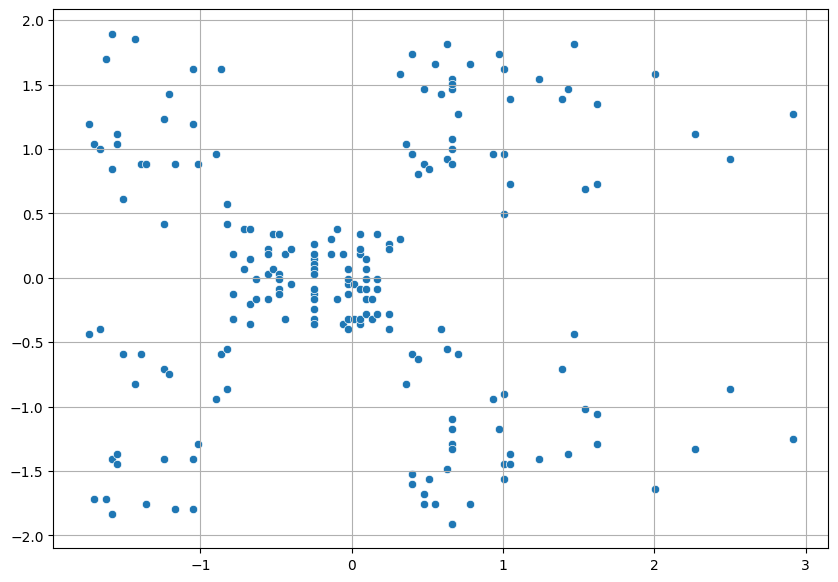

In [8]:
plt.figure(figsize=(10,7))
sb.scatterplot(x=n_data[:,0], y=n_data[:,1])
plt.grid()
plt.show()
plt.close()

## #04. 계층 군집 수행

### 1. scipy 패키지

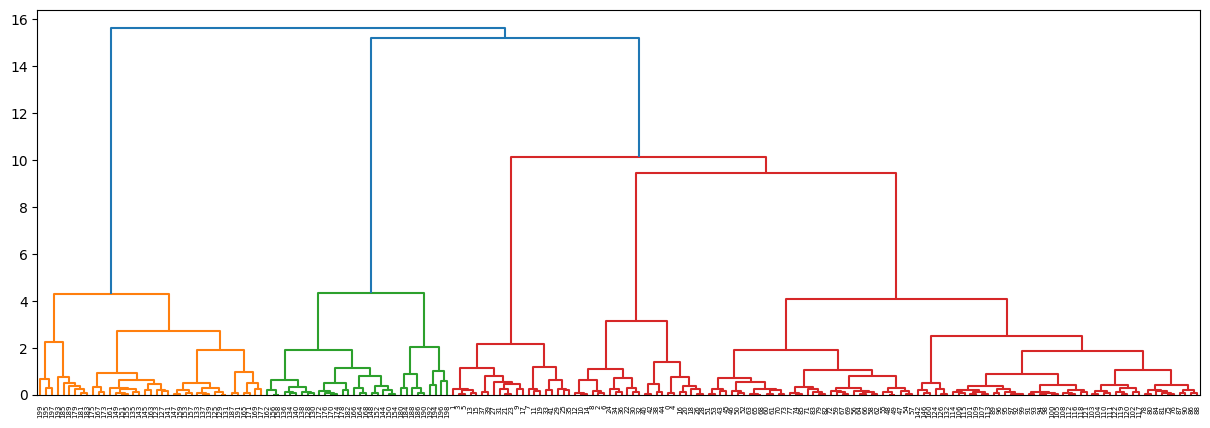

In [10]:
lnk = linkage(n_data, method='ward')

plt.figure(figsize=(15,5))
dendrogram(lnk, show_leaf_counts=True)
plt.show()
plt.close()


### 2. sklearn 패키지

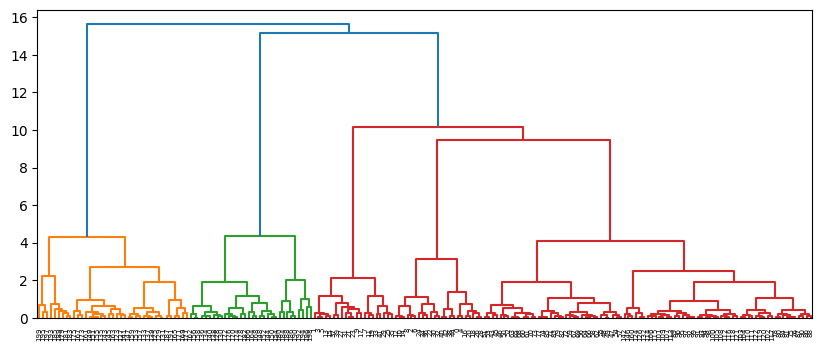

In [12]:
ac = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward', compute_distances=True)
clustering = ac.fit(n_data)
# print(clustering.labels_)

counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)

for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count +=1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
).astype(float)

plt.figure(figsize=(10,4))
dendrogram(linkage_matrix)
plt.show()
plt.close()

#### 군집수를 5로 제한했을 경우 분류 결과값

In [13]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

#### 분류 결과를 데이터 프레임과 병합

In [14]:
origin['labels'] = clustering.labels_
origin.head()

,고객ID,성별,나이,연수입,지출점수,labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [ ]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='연수입', y='지출점수', hue='labels')
plt.grid()
plt.show()
plt.close()